## Data preparation

In data preparation part i downloaded dataset,then saw it's shape,some info about dataset.
Also I visualized all numerical features.There is heatmap of features,
using this heatmap I wanted to know how much features correlate with each other,
but by picture below I saw that features doesn't correlate with each other too much.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

In [2]:
df=pd.read_csv('C:\\Users\\Алматы\\Desktop\\project data 2.csv', sep='\t', comment='#',encoding='cp1251',delimiter=';')
df.head()

,CALL_DATE,GENDER,AGE,SINCE_LAST_CALL,POS_CHANNEL,SEGMENT_,POS_CITY,POS_SDOK_KZT,ACTIVE,LIFETIME,HAD_OFFER,CNT_BANK_REJ,CNT_CLIENT_REJ,CNT_PILS,DELAYED_SUM,CNT_PAYMS,AVG_SALARY,RESPONDED
0,12.06.2019,Male,43,49,ЛТ,NaN,Караганда,249000,0,34,1,0,0,2,0.0,8,127667,0
1,18.06.2019,Male,43,0,Технодом,Бытовая техника,Алматы,156480,1,7,0,1,0,0,0.0,3,42183,0
2,14.06.2019,Female,43,0,БЛТ,Медицинские услуги,Караганда,146850,1,19,0,0,0,0,NaN,0,0,0
3,19.06.2019,Female,43,114,ЛТ,NaN,Алматы,68302,0,23,1,0,0,0,0.0,1,3821,0
4,11.03.2019,Female,42,0,Технодом,Бытовая техника,Семей,213490,1,27,1,0,0,0,0.0,6,70872,0


In [3]:
df.shape

(354523, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354523 entries, 0 to 354522
Data columns (total 18 columns):
CALL_DATE          354523 non-null object
GENDER             354523 non-null object
AGE                354523 non-null int64
SINCE_LAST_CALL    354523 non-null object
POS_CHANNEL        351398 non-null object
SEGMENT_           213427 non-null object
POS_CITY           354491 non-null object
POS_SDOK_KZT       354523 non-null object
ACTIVE             354523 non-null int64
LIFETIME           354523 non-null int64
HAD_OFFER          354523 non-null int64
CNT_BANK_REJ       354523 non-null int64
CNT_CLIENT_REJ     354523 non-null int64
CNT_PILS           354523 non-null int64
DELAYED_SUM        215798 non-null float64
CNT_PAYMS          354523 non-null int64
AVG_SALARY         354523 non-null int64
RESPONDED          354523 non-null int64
dtypes: float64(1), int64(10), object(7)
memory usage: 48.7+ MB


In [5]:
df.columns

Index(['CALL_DATE', 'GENDER', 'AGE', 'SINCE_LAST_CALL', 'POS_CHANNEL',
       'SEGMENT_', 'POS_CITY', 'POS_SDOK_KZT', 'ACTIVE', 'LIFETIME',
       'HAD_OFFER', 'CNT_BANK_REJ', 'CNT_CLIENT_REJ', 'CNT_PILS',
       'DELAYED_SUM', 'CNT_PAYMS', 'AVG_SALARY', 'RESPONDED'],
      dtype='object')

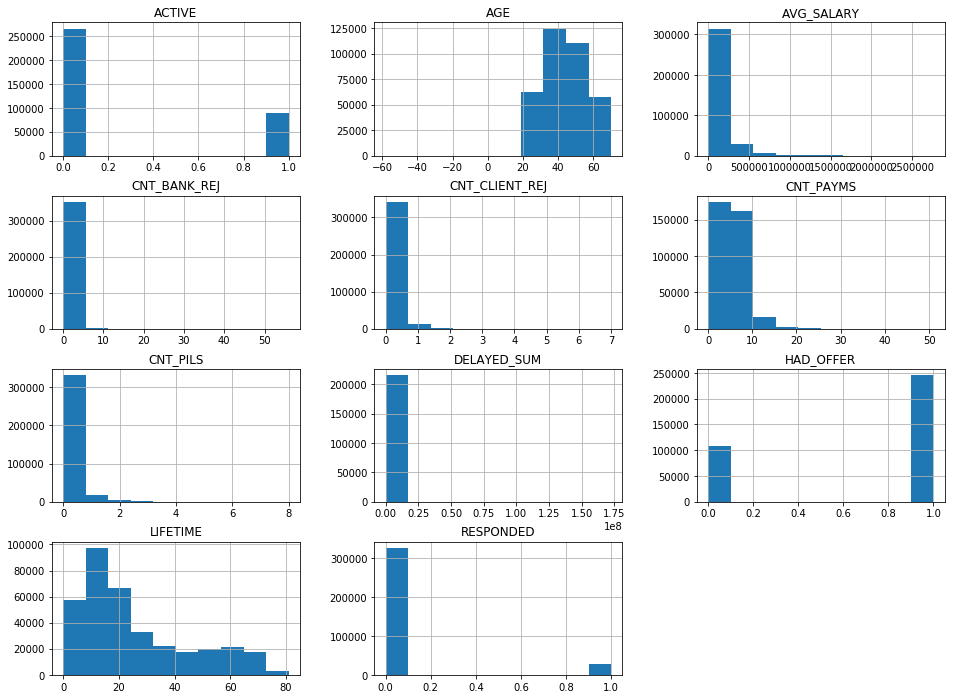

In [6]:
plt.rcParams['figure.figsize']=(16,12)
df.drop(['POS_CHANNEL','SEGMENT_','POS_CITY'],axis=1).hist();

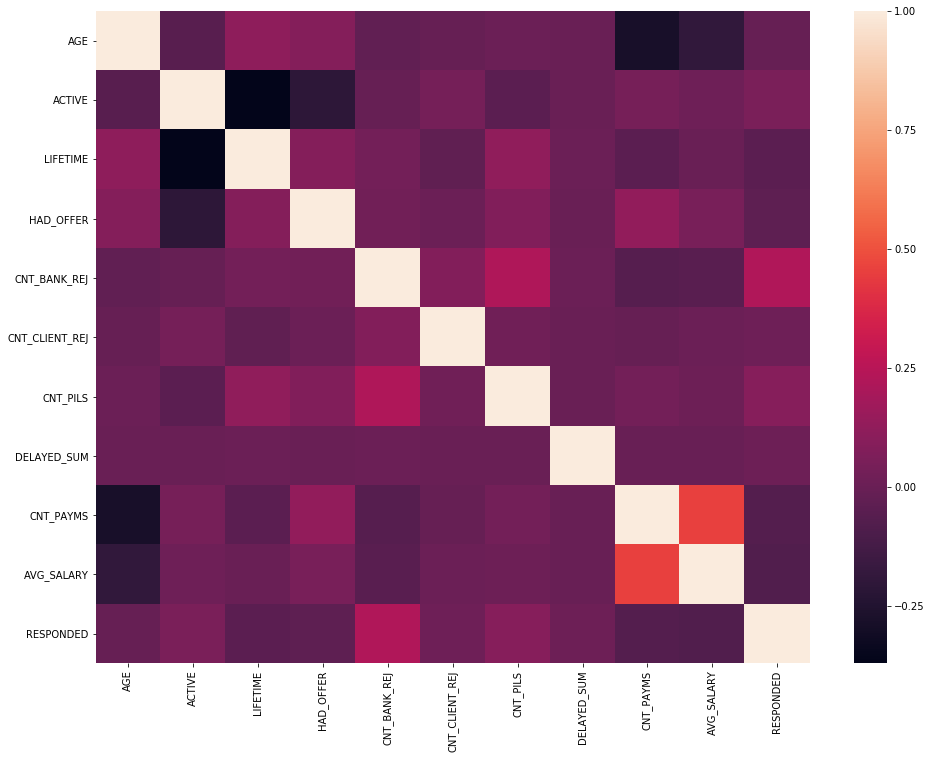

In [7]:
sns.heatmap(df.corr());

In this part I splitted data to main and target,dropped all non-numerical features,
because it was hard to work with them and also in my opinion they are not so valuable

## Splitting data to main and target

In [8]:
df.drop(['CALL_DATE', 'GENDER','SINCE_LAST_CALL','POS_CHANNEL','SEGMENT_','POS_CITY'], axis=1, inplace=True)

In [9]:
df['POS_SDOK_KZT'] = [x.replace(',', '.') for x in df['POS_SDOK_KZT']]
df['POS_SDOK_KZT'] = df['POS_SDOK_KZT'].astype(float)

In [10]:
df['POS_SDOK_KZT'] = df['POS_SDOK_KZT'].astype(int)

In [11]:
df['DELAYED_SUM'].fillna(0, inplace=True)

In [12]:
X,y=df.drop('RESPONDED',axis=1),df['RESPONDED']

In [13]:
y.value_counts(normalize=True) #8% of clients agreed

0    0.918344
1    0.081656
Name: RESPONDED, dtype: float64

## Dividing data to train and test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_holdout,y_train,y_holdout=train_test_split(X,y,test_size=0.3,random_state=17)

In [16]:
X_train.shape

(248166, 11)

I trained model with 3 algorithms:DecisionTree,kNN,RandomForest.
When training all of them I used crossvalidation.
I divided train set to 5 folds,after model trained 5 times.
Also I used GridSearchCV for parameter tuning to find the best parameters for the best accuracy.

### Decision tree classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=17)#dividing to 5 folds
from tqdm import tqdm_notebook

In [19]:
tree = DecisionTreeClassifier( random_state=17)

In [21]:
tree_params={'max_depth':np.arange(1,11)}#choosing the best depth in range of 1 and 11

In [22]:
#grid search used for parameter tuning
tree_grid = GridSearchCV(estimator=tree, param_grid=tree_params,cv=skf, n_jobs=-1, verbose=1)

In [23]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   45.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [24]:
tree_grid.best_params_ 

{'max_depth': 5}

In [25]:
tree_grid.best_score_ 

0.9189937380624259

In [26]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.9191308517539983

In [27]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from ipywidgets import Image

In [28]:
tree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [29]:
import pydotplus 
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [30]:
tree_graph_to_png(tree=tree_grid.best_estimator_, feature_names=df.drop('RESPONDED',axis=1).columns,
                 png_file_to_save='C:\\Users\\Алматы\\Desktop\\decision_tree.png')

In kNN and RF algorithms I used only 1000 instances of traning set,because fitting model with all trainig set took long time.Picture of decision tree is sended.

### kNN method classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [32]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params,cv=skf, n_jobs=-1, verbose=True)

In [33]:
knn_grid.fit(X_train.sample(n=1000), y_train.sample(n=1000))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    5.1s finished
C:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'knn__n_neighbors': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [34]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 4}, 0.927)

In [35]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

C:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9175230591310398

### Random Forest Classifier

In [36]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [37]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.921314772847755


In [38]:
forest_params = {'max_depth': range(2, 12),'max_features': range(4, 12)}
forest_grid = GridSearchCV(forest, forest_params,cv=skf, n_jobs=-1, verbose=True)

In [39]:
tqdm_notebook(forest_grid.fit(X_train.sample(n=1000), y_train.sample(n=1000))) 

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   47.5s finished


0/|/| 0/? [00:00<?, ?it/s]

In [40]:
forest_grid.best_params_, forest_grid.best_score_ 

({'max_depth': 2, 'max_features': 4}, 0.925)

In [41]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.9186607369519637

### Feature Importance

In [42]:
 from __future__ import division, print_function

In [45]:
forest.fit(X_train.sample(n=1000), y_train.sample(n=1000))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

In [46]:
importances = forest.feature_importances_

In [47]:
features = {
"f1":u"AGE",
"f2":u"POS_SDOK_KZT",
"f3":u"ACTIVE",
"f4":u"LIFETIME",
"f5":u"HAD_OFFER",
"f6":u"CNT_BANK_REJ",
"f7":u"CNT_CLIENT_REJ",
"f8":u"CNT_PILS",
"f9":u"DELAYED_SUM",
"f10":u"CNT_PAYMS",
"f11":u"AVG_SALARY"}

In [48]:
indices = np.argsort(importances)[::-1]

In [49]:
num_to_plot = 11
feature_indices = [ind+1 for ind in indices[:num_to_plot]]


Feature ranking:
1. POS_SDOK_KZT 0.230995 
2. LIFETIME 0.190893 
3. AVG_SALARY 0.185770 
4. AGE 0.184699 
5. CNT_PAYMS 0.094683 
6. CNT_BANK_REJ 0.031485 
7. HAD_OFFER 0.031359 
8. CNT_CLIENT_REJ 0.022313 
9. ACTIVE 0.021753 
10. CNT_PILS 0.004379 
11. DELAYED_SUM 0.001671 


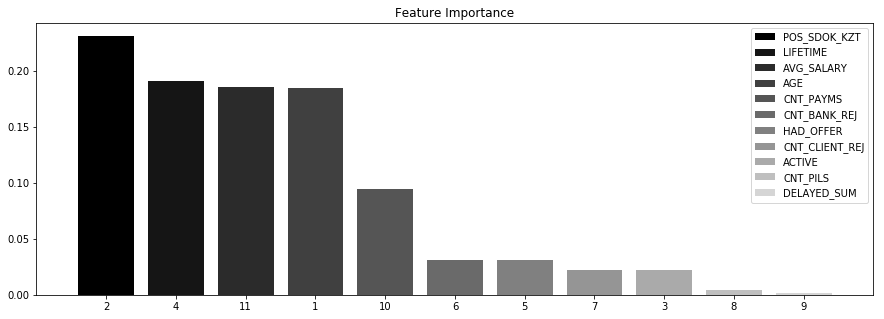

In [50]:
print("Feature ranking:")
  
for f in range(num_to_plot):
    print("%d. %s %f " % (f + 1, 
            features["f"+str(feature_indices[f])], 
            importances[indices[f]]))
plt.figure(figsize=(15,5))
plt.title(u"Feature Importance")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot+1)) 
               for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) 
                  for i in feature_indices]);

### Conclusion crosstab

In [56]:
conclusion=pd.DataFrame({'accuracy':[accuracy_score(y_holdout, tree_grid.predict(X_holdout)),
                                     accuracy_score(y_holdout,knn_grid.predict(X_holdout)),
                                     accuracy_score(y_holdout, forest_grid.predict(X_holdout))]}, index=['DT','kNN','RF'])

C:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [57]:
conclusion

,accuracy
DT,0.919131
kNN,0.917523
RF,0.918661
